## <code>GerchbergSaxton_Matrix.ipynb </code> 
    - 03-30-2022
    - Author: Raghav K. Chhetri
    - Phase Retrievel via Gerchberg-Saxton algorithm to generate phase masks for an SLM 
    - Using "LightPipes for Python"

In [1]:
from matrixpack import target_pattern, generate_mask
from LightPipes import LPtest, nm, um, mm, Intensity
import matplotlib
%matplotlib inline
import pylab as plt
import sys
import os

Invoking __init__.py for matrixpack


In [2]:
print('Environment: {}'.format(sys.exec_prefix))
print('Executable: {}'.format(sys.executable))
print('Python version: {}'.format(sys.version))
print('Matplotlib', matplotlib.__version__)
LPtest()

Environment: C:\Users\Raghav\anaconda3\envs\matrix
Executable: C:\Users\Raghav\anaconda3\envs\matrix\python.exe
Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Matplotlib 3.5.0
LightPipes for Python: test passed.
LightPipes version: 2.1.2


In [3]:
outPath = os.getcwd()+'\masks'

### Computation
---
Convention for `movebeams_um`

        movebeams_um=[beam1,beam2,beam3,
                      beam4,beam5,beam6,
                      beam7,beam8,beam9]
        where
        far = beams1-4-7
        mid = beams2-5-8
        near = beams3-6-9  
    +ve values for `movebeams_um` moves the beam UP in sample space i.e., along +Z in the microscope
    
    1. Define target pattern `target_pattern()`
    2. Compute phase mask to generate the above target pattern when applied to an SLM `generate_mask`

Pixels in the grid: 6650
Pixels along SLM height: 1920
SLM sufficiently sampled: PROCEED. 

Input Field on the SLM:
<class 'numpy.ndarray'> complex128 (6650, 6650) 

Target Field Intensity:
<class 'numpy.ndarray'> (6650, 6650) 0.0 255.0 float64
Took 136.31 sec
<class 'numpy.ndarray'> (6650, 6650) float64
<class 'numpy.ndarray'> (1152, 1920) uint8


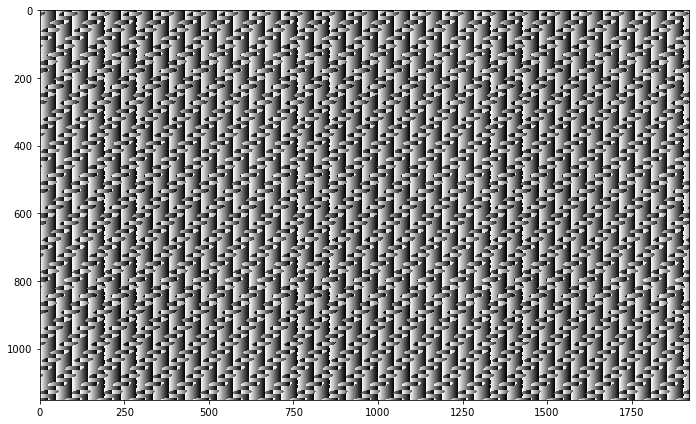

In [4]:
wavelength = 488*nm
Niter = 100
tag='MATRIX'
movebeams_um=[0,0,0,
              0,0,0,
              0,0,0]

[SLMfield, target, footer] = target_pattern(wavelength, tag, movebeams_um)
generate_mask(wavelength, Niter, SLMfield, target, footer, tag, outPath)

Pixels in the grid: 6650
Pixels along SLM height: 1920
SLM sufficiently sampled: PROCEED. 

Input Field on the SLM:
<class 'numpy.ndarray'> complex128 (6650, 6650) 

Target Field Intensity:
<class 'numpy.ndarray'> (6650, 6650) 0.0 255.0 float64
Took 2771.54 sec
<class 'numpy.ndarray'> (6650, 6650) float64
<class 'numpy.ndarray'> (1152, 1920) uint8


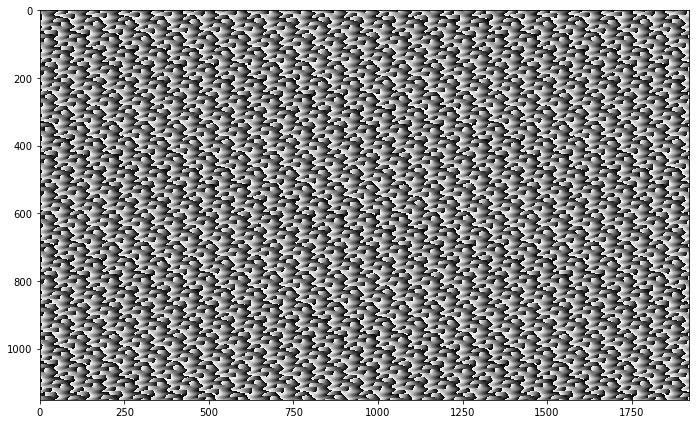

In [5]:
wavelength = 488*nm
Niter = 100
tag='MATRIX'
movebeams_um=[-5,-5,-5,
              0,0,0,
              5,5,5]

[SLMfield, target, footer] = target_pattern(wavelength, tag, movebeams_um)
generate_mask(wavelength, Niter, SLMfield, target, footer, tag, outPath)

In [ ]:
wavelength = 488*nm
Niter = 100
tag='MATRIX'
movebeams_um=[5,5,5,
              0,0,0,
              -5,-5,-5]

[SLMfield, target, footer] = target_pattern(wavelength, tag, movebeams_um)
generate_mask(wavelength, Niter, SLMfield, target, footer, tag, outPath)

Pixels in the grid: 6650
Pixels along SLM height: 1920
SLM sufficiently sampled: PROCEED. 

Input Field on the SLM:
<class 'numpy.ndarray'> complex128 (6650, 6650) 

Target Field Intensity:
<class 'numpy.ndarray'> (6650, 6650) 0.0 255.0 float64


### Plot Field Intensities
---

In [ ]:
#Plot field intensities
ISLM = Intensity(SLMfield)
high= 1000
hoff= 100
wide= 600
woff= 300
top= len(target)//2 - high//2 + hoff
bottom= len(target)//2 + high//2 - hoff
left= len(target)//2 - wide//2 
right= len(target)//2 + wide//2 - woff

plt.figure(figsize=(17,17))
plt.subplot(1,2,1)
plt.title('Intensity (at SLM)')
plt.imshow(ISLM,cmap='jet')
plt.subplot(1,2,2)
plt.title('Intensity (at target)')
plt.imshow(target[top:bottom,left:right], cmap='gray')
plt.show()